В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_cars = pd.read_csv("/content/drive/MyDrive/ML course/data/cars.csv")

In [4]:
df_cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
pd.DataFrame.info(df_cars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
df_cars.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [7]:
df_cars.select_dtypes(object)

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [8]:
df_cars.Brand.unique(), df_cars.Brand.nunique()

(array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
        'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object),
 11)

In [9]:
df_cars.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [10]:
df_cars.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df_cars.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

In [12]:
df_cars.Seats.unique()

array([5, 4, 7])

У  цьому датасеті 8 числових колонок(разом із Car ID) та 5 категоріальних колонок у яких:
- fuel_type і Transmission - бінарні (мають тільки 2 значення)
- Owner_type та Seats мультикатегоріальні по 3 значення
- колонку Year можна встановити відношення порядку типу: нова, середня, стара
- також, напевно, можна об'єм двигуна встановити відношення порядку: under 2000, 2000-3500, over 3500

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [13]:
inputs, targets = df_cars[['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']], df_cars['Price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [16]:
df_cars['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [17]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}

In [18]:
X_train['Fuel_Type_codes'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_codes'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [19]:
df_cars['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [20]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}

In [21]:
X_train['Transmission_codes'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(Transmission_codes)

In [22]:
from sklearn import preprocessing
Brand_1 = preprocessing.OneHotEncoder()
Brand_2 = preprocessing.OneHotEncoder()
Brand_1.fit(X_train[['Brand']])
Brand_2.fit(X_test[['Brand']])
Brand_1.categories_, Brand_2.categories_

([array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
         'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)],
 [array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
         'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)])

In [23]:
one_brand1 = Brand_1.transform(X_train[['Brand']]).toarray()
one_brand2 = Brand_2.transform(X_test[['Brand']]).toarray()
one_brand1, one_brand2

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.,

In [24]:
X_train[Brand_1.categories_[0]] = one_brand1
X_test[Brand_2.categories_[0]] = one_brand2

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [26]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [27]:
X_train.dtypes

Car_ID                  int64
Brand                  object
Model                  object
Year                    int64
Kilometers_Driven       int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage                 int64
Engine                  int64
Power                   int64
Seats                   int64
Fuel_Type_codes         int64
Transmission_codes      int64
Audi                  float64
BMW                   float64
Ford                  float64
Honda                 float64
Hyundai               float64
Mahindra              float64
Maruti                float64
Mercedes              float64
Tata                  float64
Toyota                float64
Volkswagen            float64
Owner_Type_Codes      float64
dtype: object

In [28]:
Y_train

83    1600000
55    2600000
26    3200000
54     650000
19    2500000
       ...   
3      600000
2     2500000
6      900000
27    2800000
75    3500000
Name: Price, Length: 80, dtype: int64

In [29]:
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_train

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,3,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27,28,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
pd.concat([X_train, Y_train], axis=1)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,3,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
27,28,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


In [31]:
corr_train = pd.concat([Y_train, X_train], axis=1)

In [32]:
corr_X_train = corr_train.select_dtypes(include='number').corr()
corr_X_train

,Price,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
Price,1.000000,0.025560,-0.233769,-0.083951,-0.638404,0.710561,0.849137,0.000979,-0.110782,0.680731,0.328858,0.477522,-0.004592,-0.209779,-0.263022,-0.178627,-0.249737,0.431606,-0.341815,-0.023778,-0.158742,-0.265537
Car_ID,0.025560,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923
Year,-0.233769,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499
Kilometers_Driven,-0.083951,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772
Mileage,-0.638404,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624
Engine,0.710561,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106
Power,0.849137,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309
Seats,0.000979,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849
Fuel_Type_codes,-0.110782,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122
Transmission_codes,0.680731,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886


З цільовою змінною Price найбільше корелюють такі змінні:
- Power	0.849137
- Engine	0.710561
- Transmission_codes	0.680731
- Mileage	-0.638404

І що цікаво до кореляції 0,5 наближаються марки Mercedes та BMW))

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [33]:
X_test = X_test.select_dtypes(include=['int64', 'float64'])
X_test

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
31,32,2017,32000,22,1582,126,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89,90,2018,32000,17,1197,81,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
15,16,2017,42000,25,1498,98,5,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,22,2020,15000,18,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
60,61,2019,24000,17,1497,113,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
inputs, targets = X_train, Y_train

model = LinearRegression().fit(inputs, targets)

In [36]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [37]:
loss_train = mean_squared_error(targets, predictions_train, squared=False)
loss_test = mean_squared_error(Y_test, predictions_test, squared=False)

print('Loss train:', loss_train, 'Loss test:', loss_test)

Loss train: 210293.57828151877 Loss test: 258181.56112032934


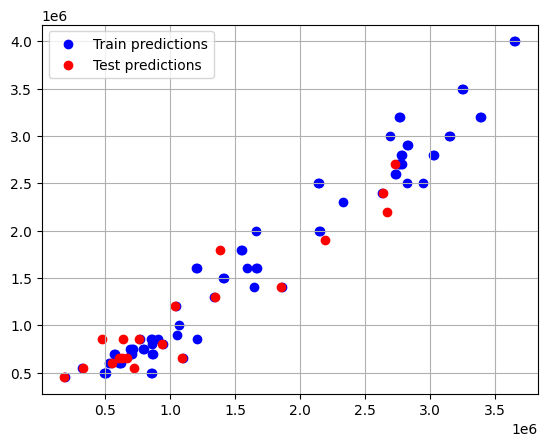

In [38]:
plt.scatter(predictions_train, Y_train, color='blue', label='Train predictions')
plt.scatter(predictions_test, Y_test, color='red', label='Test predictions')
plt.legend()
plt.grid(True)

Loss на тестовій моделі поки що суттєво гірший ніж на тренованій цифрами Не відомо на скільки в абсолютній величині гірший результат, проте цифра суттєва, на мою думку.

На діграмі розсіювання видно, що не зовсім лінійно лягають передбачення на тестовому графіку, на початку є більші відхилення, які додають нелінійності. Можливо вибірка тестова замала для цьго експерименту.'

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цільову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [41]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions, squared=False)
  print('Loss:', loss)
  return model

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [44]:
X_train.head(1)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [45]:
scaler

StandardScaler()

In [46]:
scaler.mean_, scaler.var_

(array([5.3162500e+01, 2.0183625e+03, 2.8362500e+04, 1.7062500e+01,
        1.9107375e+03, 1.6688750e+02, 5.2250000e+00, 5.1250000e-01,
        6.1250000e-01, 1.0000000e-01, 1.1250000e-01, 1.1250000e-01,
        6.2500000e-02, 7.5000000e-02, 5.0000000e-02, 6.2500000e-02,
        1.1250000e-01, 1.2500000e-01, 1.0000000e-01, 8.7500000e-02,
        6.5000000e-01]),
 array([7.99036094e+02, 1.25609375e+00, 8.40810938e+07, 1.16335937e+01,
        4.31270294e+05, 6.62974984e+03, 5.49375000e-01, 2.49843750e-01,
        2.37343750e-01, 9.00000000e-02, 9.98437500e-02, 9.98437500e-02,
        5.85937500e-02, 6.93750000e-02, 4.75000000e-02, 5.85937500e-02,
        9.98437500e-02, 1.09375000e-01, 9.00000000e-02, 7.98437500e-02,
        4.27500000e-01]))

In [48]:
scaled_X_tr = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_X_tr.head(2)


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
1,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135


In [49]:
loss = train_model_show_rmse(X_train, Y_train)
print('Test Loss:', loss)

Loss: 210293.57828151877
Test Loss: LinearRegression()


In [50]:
loss_tr = train_model_show_rmse(scaled_X_tr, Y_train)
print('Test Loss:', loss)

Loss: 210293.57828151854
Test Loss: LinearRegression()


In [51]:
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
scaled_X_test.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,-1.243932,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303
1,-0.394892,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,3.511885,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742
2,1.409318,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
3,-1.350062,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
4,0.560278,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742


In [52]:
inputs7, targets7 = scaled_X_tr, Y_train

model7 = LinearRegression().fit(inputs7, targets7)

In [53]:
predictions7_train = model7.predict(scaled_X_tr)
predictions7_test = model7.predict(scaled_X_test)

In [54]:
loss7_train = mean_squared_error(Y_train, predictions7_train, squared=False)
loss7_test = mean_squared_error(Y_test, predictions7_test, squared=False)

print('Loss7 train:', loss7_train, 'Loss7 test:', loss7_test)

Loss7 train: 210293.57828151854 Loss7 test: 258181.56112032832


In [61]:
weights_df = pd.DataFrame({
    'feature': np.append(X_test.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
pd.options.display.float_format = '{:.2f}'.format
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,17387451.06
9,Audi,756997.39
16,Mercedes,736415.67
10,BMW,731220.83
8,Transmission_codes,239529.37
18,Toyota,124349.23
20,Owner_Type_Codes,64763.99
5,Power,6101.07
0,Car_ID,198.42
2,Kilometers_Driven,-10.29


In [62]:
weights_df = pd.DataFrame({
    'feature': np.append(X_test.columns, 1),
    'weight': np.append(model7.coef_, model7.intercept_)
})
pd.options.display.float_format = '{:.2f}'.format
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1680000.00
5,Power,496769.21
16,Mercedes,210048.78
10,BMW,208407.31
9,Audi,205600.15
8,Transmission_codes,116693.77
20,Owner_Type_Codes,42344.95
18,Toyota,15805.70
0,Car_ID,5608.69
6,Seats,-2148.92


Найбільшу вагу на збільшення має константа.
Найбільшу вагу після масштабованих і натренованих даних має тепер Power, потім ідуть марки Mercedes, BMW, Audi, вони впливають на збільшення. На зменшення впливає тип пального, далі ідуть марки Hyndai, Mahindra, Mileage, Ford. І аж тепер впливають ознаки такі як тип трансмісії(на збільшення) і пробіг(на зменшення)

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [76]:
import statsmodels.api as sm

Y_tr = Y_train
X_tr = scaled_X_tr
X_tr = sm.add_constant(X_tr)
model_stats_tr = sm.OLS(Y_tr.values, X_tr)
results = model_stats_tr.fit()
results.params

const                1680000.00
Car_ID                  5608.69
Year                   -8765.65
Kilometers_Driven     -94398.72
Mileage              -131715.51
Engine                -21377.45
Power                 496769.21
Seats                  -2148.92
Fuel_Type_codes      -183848.02
Transmission_codes    116693.77
Audi                  205600.15
BMW                   208407.31
Ford                 -118209.45
Honda                 -62753.01
Hyundai              -152304.86
Mahindra             -140945.16
Maruti               -112259.97
Mercedes              210048.78
Tata                  -65996.25
Toyota                 15805.70
Volkswagen            -92968.26
Owner_Type_Codes       42344.95
dtype: float64

In [77]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.01e-33
Time:                        07:09:49   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

R-квадрат дає якість моделі 0,959, що дуже добре.Досить високе значення F-статистики і дуже мале P_value показує, що модель в цілому значуща та незалежні змінні значно впливають на таргет.

Стат значущі ознаки < 0.05:
- Mileage 0.028
- Power 0.000
- Fuel_Type_codes 0.000
- Transmission_codes 0.01
- Марки автомобілів (Audi, BMW, Ford, Mahindra, Maruti, Mercedes, Volkswagen)

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [82]:
#Визначаємо X зі стат значущими ознаками
X_tr_stat_sign = scaled_X_tr[['Mileage', 'Power', 'Fuel_Type_codes', 'Transmission_codes',
                              'Audi', 'BMW', 'Ford', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen']]

Y_tr_sign = Y_train
X_tr_sign = X_tr_stat_sign
X_tr_sign = sm.add_constant(X_tr_sign)
model_stat_sign = sm.OLS(Y_tr_sign.values, X_tr)
results = model_stat_sign.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.01e-33
Time:                        07:59:06   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

R-2 та  Adj. R-squared не змінились взагалі, може бракує знаків після коми, схожа ситуація була коли 10-й знак після коми змінився у Loss scaled_X_tr порівняно з початковим X_train

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [91]:
Y = Y_train
X_scaled = scaled_X_tr
X_scaled = sm.add_constant(X_scaled)
model_scaled = sm.OLS(Y.values, X_scaled)
results_Scaled = model_stats_tr.fit()
print(results_Scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.01e-33
Time:                        09:04:15   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

P_value для моделі з Масштабованими даними які < 0.25:
- Kilometers_Driven
- Mileage
- Power
- Fuel_type_codes
- Transsmission_codes
- всі марки автомобілів окрім Toyota

In [92]:
X_tr_stat_sign_25 = scaled_X_tr[['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_codes', 'Transmission_codes',
                              'Audi', 'BMW', 'Ford', 'Honda', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']]

Y_tr_sign_25 = Y_train
X_tr_sign_25 = X_tr_stat_sign
X_tr_sign_25 = sm.add_constant(X_tr_sign_25)
model_stat_sign_25 = sm.OLS(Y_tr_sign_25.values, X_tr_sign_25)
results = model_stat_sign_25.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.93e-38
Time:                        09:04:43   Log-Likelihood:                -1106.2
No. Observations:                  80   AIC:                             2236.
Df Residuals:                      68   BIC:                             2265.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.97

При використанні змінних з p_value < 0.25, а не 0.05 трошки погіршило якість моделі, проте вона все ще залишається дуже хорошою.
R-squared:  0.944
Adj. R-squared: 0.935
значення зовсім трошки зменшились.


Я би як основну використав останню модель, все ж тому, що вона враховує більше ознак, можливо не таких статистично значущих, проте в нас якість моделі залишаєтьс яна дуже високому рівні.